C:\Users\User\AppData\Local\Temp\ipykernel_5648\1260936458.py:99: RuntimeWarning: invalid value encountered in power
  return np.power(left_value, right_value)
C:\Users\User\AppData\Local\Temp\ipykernel_5648\1260936458.py:108: RuntimeWarning: overflow encountered in scalar power
  result += value ** (i + 1)


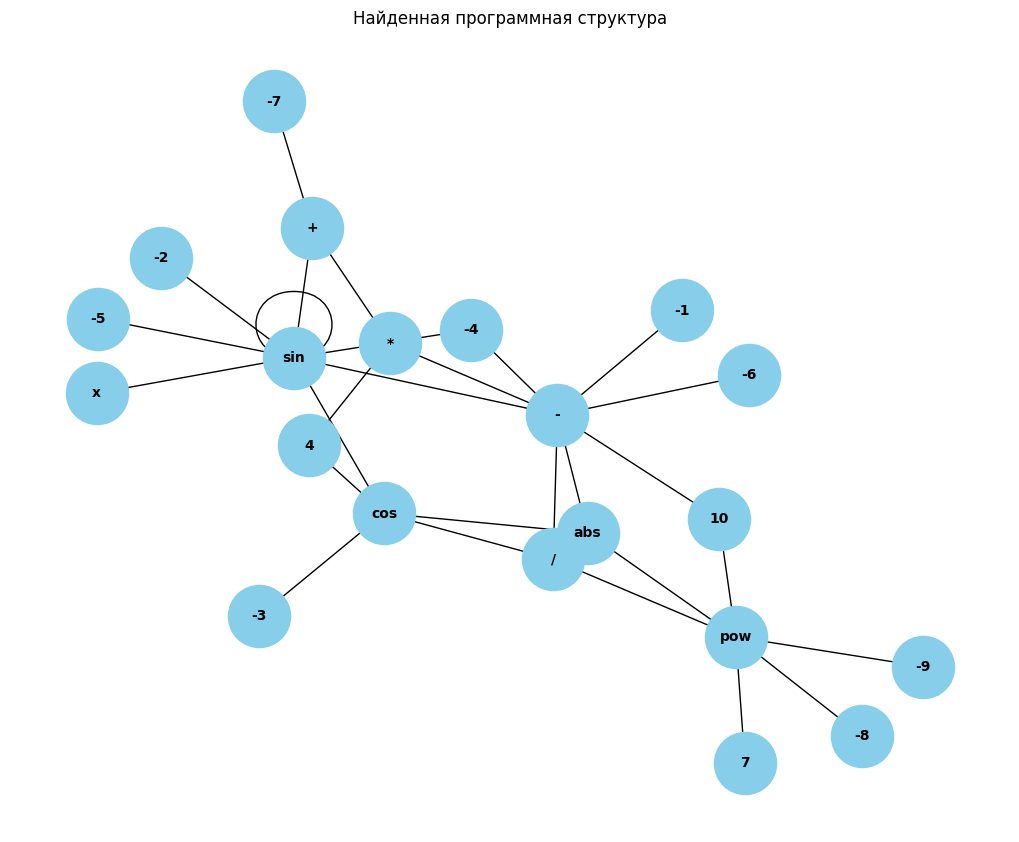

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Определение узла дерева
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
    
    def depth(self):
        left_depth = self.left.depth() if self.left else 0
        right_depth = self.right.depth() if self.right else 0
        return max(left_depth, right_depth) + 1

# Создание начальной популяции
def create_initial_population(population_size, max_depth):
    return [create_random_tree(max_depth) for _ in range(population_size)]

# Операторы и операнды
operators = ['+', '-', '*', '/', 'abs', 'sin', 'cos', 'exp', 'pow']
variables = ['x']
constants = [str(i) for i in range(-10, 11)]

# Функция для создания случайного дерева программы
def create_random_tree(max_depth):
    if max_depth == 0 or random.random() < 0.3:  # Вероятность создания листа
        value = random.choice(variables + constants)
        return Node(value)
    else:
        value = random.choice(operators)
        node = Node(value)
        node.left = create_random_tree(max_depth - 1)
        node.right = create_random_tree(max_depth - 1)
        return node

# Функция для оценки дерева программы
def evaluate_tree(node, x):
    if node is None:
        return None
    if node.value in constants:
        return float(node.value)
    elif node.value == 'x':
        return x
    elif node.value == '+':
        left_value = evaluate_tree(node.left, x)
        right_value = evaluate_tree(node.right, x)
        if left_value is None or right_value is None:
            return None
        return left_value + right_value
    elif node.value == '-':
        left_value = evaluate_tree(node.left, x)
        right_value = evaluate_tree(node.right, x)
        if left_value is None or right_value is None:
            return None
        return left_value - right_value
    elif node.value == '*':
        left_value = evaluate_tree(node.left, x)
        right_value = evaluate_tree(node.right, x)
        if left_value is None or right_value is None:
            return None
        return left_value * right_value
    elif node.value == '/':
        left_value = evaluate_tree(node.left, x)
        right_value = evaluate_tree(node.right, x)
        if left_value is None or right_value is None:
            return None
        # Добавим проверку деления на 0
        if right_value == 0:
            return None
        return left_value / right_value
    elif node.value == 'abs':
        value = evaluate_tree(node.left, x)
        if value is None:
            return None
        return abs(value)
    elif node.value == 'sin':
        value = evaluate_tree(node.left, x)
        if value is None:
            return None
        return np.sin(value)
    elif node.value == 'cos':
        value = evaluate_tree(node.left, x)
        if value is None:
            return None
        return np.cos(value)
    elif node.value == 'exp':
        value = evaluate_tree(node.left, x)
        if value is None:
            return None
        return np.exp(value)
    elif node.value == 'pow':
        left_value = evaluate_tree(node.left, x)
        right_value = evaluate_tree(node.right, x)
        if left_value is None or right_value is None:
            return None
        return np.power(left_value, right_value)

# Функция для вычисления значения функции
def compute_function_value(program, x):
    result = 0
    for i, xi in enumerate(x):
        value = evaluate_tree(program, xi)
        if value is None:
            return None
        result += value ** (i + 1)
    return result

# Функция для скрещивания двух программ
def crossover(parent1, parent2):
    # Проверяем, что оба родителя имеют глубину больше 1
    if parent1.depth() < 2 or parent2.depth() < 2:
        # Возвращаем одного из родителей
        return parent1 if random.random() < 0.5 else parent2
    
    # Выбираем случайную точку раздела
    crossover_point = random.randint(1, min(parent1.depth(), parent2.depth()) - 1)
    
    # Скрещиваем родителей
    child = Node(parent1.value)
    if parent1.depth() > crossover_point:
        child.left = crossover(parent1.left, parent2)
    else:
        child.left = parent1.left if random.random() < 0.5 else parent2.left
    if parent2.depth() > crossover_point:
        child.right = crossover(parent1, parent2.right)
    else:
        child.right = parent1.right if random.random() < 0.5 else parent2.right
    
    return child

# Выполнение эволюционного алгоритма
def genetic_programming(population_size, max_depth, generations, x_range):
    population = create_initial_population(population_size, max_depth)
    best_program = None
    best_fitness = float('-inf')
    fitness_history = []

    for generation in range(generations):
        # Вычисление fitness для каждой программы в популяции
        fitness_scores = []
        for program in population:
            fitness = compute_function_value(program, x_range)
            if fitness is not None:
                fitness_scores.append(fitness)
                # Обновляем лучшее значение fitness для текущего поколения
                if fitness > best_fitness:
                    best_fitness = fitness
                    best_program = program

        # Проверка наличия допустимых значений fitness
        if not fitness_scores:
            continue

        # Выбор следующего поколения
        selected_indices = np.argsort(fitness_scores)[-population_size:]
        next_generation = [population[i] for i in selected_indices]

        # Мутация и скрещивание
        while len(next_generation) < population_size:
            parent1 = random.choice(next_generation)
            parent2 = random.choice(next_generation)
            child = crossover(parent1, parent2)
            next_generation.append(child)

        population = next_generation
        fitness_history.append(best_fitness)

    return best_program, best_fitness, fitness_history

# Ограничения переменной x
x_range = np.linspace(-5.12, 5.12, 100)

# Запуск генетического программирования
population_size = 50
max_depth = 5
generations = 50
best_program, best_fitness, fitness_history = genetic_programming(population_size, max_depth, generations, x_range)

# Визуализация найденной программы
def visualize_tree(node, G, parent=None):
    if node is None:
        return
    current_node = str(node.value)
    G.add_node(current_node)
    if parent:
        G.add_edge(parent, current_node)
    if node.left:
        visualize_tree(node.left, G, current_node)
    if node.right:
        visualize_tree(node.right, G, current_node)

G = nx.Graph()
visualize_tree(best_program, G)
pos = nx.spring_layout(G)
plt.figure(figsize=(10, 8))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold", arrows=False)
plt.title("Найденная программная структура")
plt.show()